<a href="https://colab.research.google.com/github/RajeshGH-Repo/FirstMLProject/blob/main/RunningANN-on-GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
%matplotlib inline

In [11]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
tf.test.is_built_with_cuda()

True

In [13]:
import numpy as np

In [21]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [24]:
y_train

6

In [25]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [26]:
X_train_scaled = X_train/255
X_test_scaled = X_test /255

In [27]:
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')

In [28]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')

In [31]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')]
)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 14s 5ms/step - loss: 1.9003 - accuracy: 0.3252
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6685 - accuracy: 0.4010
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5919 - accuracy: 0.4310
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5405 - accuracy: 0.4507
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4993 - accuracy: 0.4614
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4741 - accuracy: 0.4723
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4480 - accuracy: 0.4863
Epoch 8/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4290 - accuracy: 0.4893
Epoch 9/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4118 - accuracy: 0.4950
Epoch 10/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.39

In [38]:
np.argmax(model.predict(X_test_scaled)[1])

313/313 [==============================] - 1s 2ms/step


9

In [39]:
classes[9]

'truck'

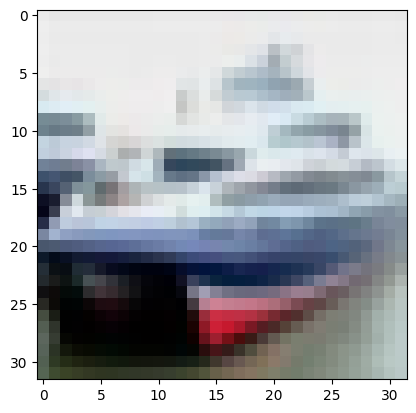

In [40]:
plt.imshow(X_test_scaled[1])

Runing the model on CPU instead **GPU**

In [ ]:
with tf.device('/CPU:0'):
  cpu_model = model
  cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)


Runing the model on GPU

In [ ]:
with tf.device('/GPU:0'):
  cpu_model = model
  cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)